In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%maltplotlib inline


UsageError: Line magic function `%maltplotlib` not found.


In [4]:
data = pd.read_csv(r"E:\Magesh_Tech\archive\car data.csv")
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


### Finding Categorical Data for manipulation

In [5]:
data_categorical = [[i,list(data[i].unique())] for i in data.columns if data[i].dtype =='O' if len(list(data[i].unique())) <=15 ]
data_categorical

[['Fuel_Type', ['Petrol', 'Diesel', 'CNG']],
 ['Seller_Type', ['Dealer', 'Individual']],
 ['Transmission', ['Manual', 'Automatic']]]

In [6]:
data['Owner'].unique() # So considering this as an categorical Data

array([0, 1, 3], dtype=int64)

### Checking for any null values

In [7]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### To build the model we will manipulate without Car_name since it has large unique values

In [9]:
data_without_Carname = data.drop(['Car_Name'], axis = 1)
data_without_Carname

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


### To check the age of car

In [10]:
from datetime import date

In [11]:
data_without_Carname['Age_car'] = date.today().year - data_without_Carname['Year']
data_without_Carname

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_car
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,5
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,6
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,12
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,4


In [12]:
### Since Year wont be affective in manipulation dropping the year column

final_data = data_without_Carname.drop(['Year'],axis = 1) 
final_data

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,5
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,6
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,12
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,4


### To Do Feature Engineering

In [13]:
final_data_features = pd.get_dummies(final_data, drop_first=True)

In [14]:
final_data_features

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,5,1,0,0,1
297,4.00,5.90,60000,0,6,0,1,0,1
298,3.35,11.00,87934,0,12,0,1,0,1
299,11.50,12.50,9000,0,4,1,0,0,1


### To check for Co-Relation

In [15]:
final_data_features.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Age_car,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


Text(0.5, 1.0, 'CO - RELATIONS')

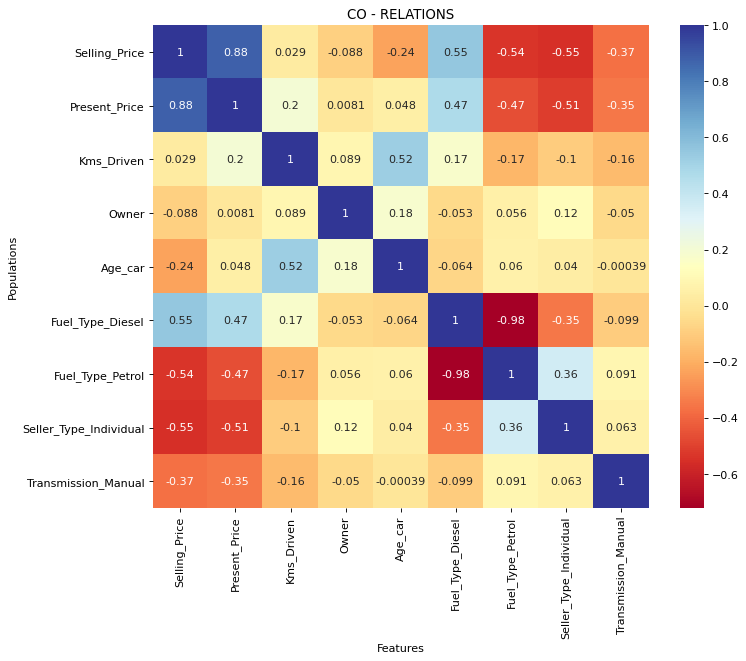

In [16]:

plt.figure(figsize=(10,8), dpi=80)

sns.heatmap(final_data_features.corr(),cmap= "RdYlBu",robust = True,annot = True)


plt.xlabel('Features')
plt.ylabel('Populations')
plt.title('CO - RELATIONS')



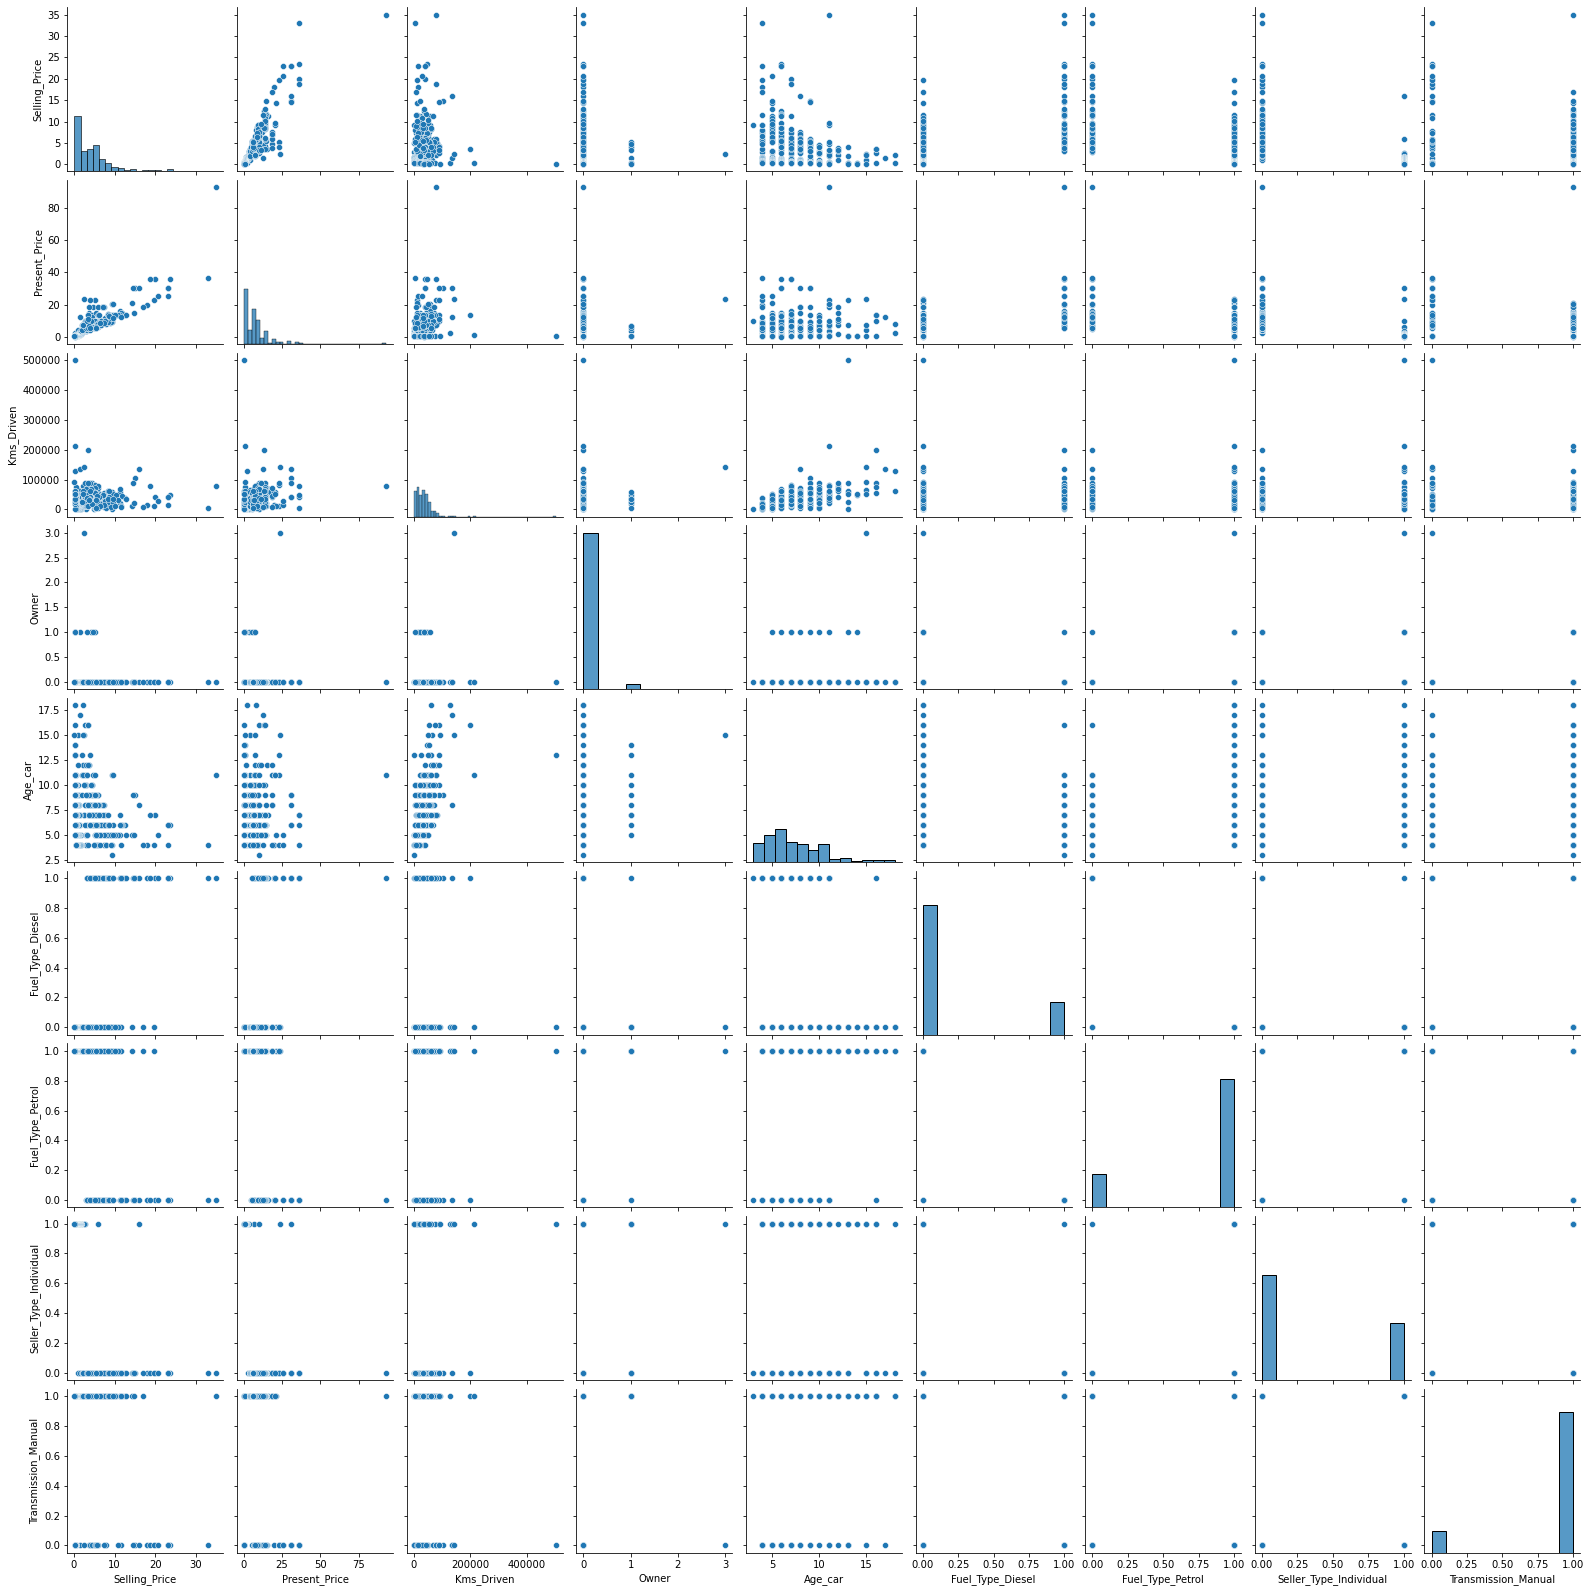

In [17]:
sns.pairplot(final_data_features)

### Seperating Dependent features

In [18]:
final_data_features.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [19]:
Dependent = final_data_features.iloc[:,0]

y = Dependent
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

### Seperating Independent Features

In [20]:
independent = final_data_features.iloc[:,1:]
X = independent
X.head()

,Present_Price,Kms_Driven,Owner,Age_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


### Feature Selection

In [21]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [22]:
### The Features which has the strong relation to dependennt Feature

print(model.feature_importances_)

[0.388898   0.04035393 0.00091791 0.0785643  0.21722368 0.00843346
 0.13780238 0.12780634]


In [23]:
features_importance = pd.Series(sorted(model.feature_importances_),index = X.columns)
features_importance

Present_Price             0.000918
Kms_Driven                0.008433
Owner                     0.040354
Age_car                   0.078564
Fuel_Type_Diesel          0.127806
Fuel_Type_Petrol          0.137802
Seller_Type_Individual    0.217224
Transmission_Manual       0.388898
dtype: float64

<AxesSubplot:>

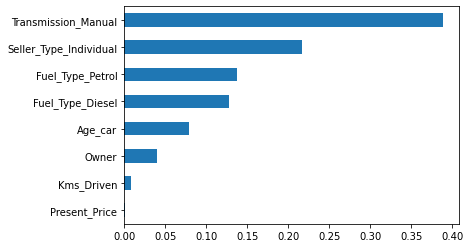

In [24]:
features_importance.plot(kind = 'barh')

### Train, Test & Split

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y) # Test size is default 0.25

In [26]:
X_train # Independent Feature

,Present_Price,Kms_Driven,Owner,Age_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
272,10.00,27600,0,6,0,1,0,1
0,5.59,27000,0,7,0,1,0,1
82,25.39,15000,0,4,1,0,0,0
267,9.40,19434,0,5,1,0,0,1
256,13.60,49562,0,5,0,1,0,1
...,...,...,...,...,...,...,...,...
151,0.55,31000,0,5,0,1,1,1
75,6.80,36000,0,6,0,1,0,1
298,11.00,87934,0,12,0,1,0,1
85,23.73,142000,3,15,0,1,1,0


In [27]:
y_train # Dependent Feature

272     7.50
0       3.35
82     23.00
267     8.35
256    10.25
       ...  
151     0.50
75      3.95
298     3.35
85      2.50
86     35.00
Name: Selling_Price, Length: 225, dtype: float64

In [28]:
X_test

,Present_Price,Kms_Driven,Owner,Age_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
76,14.68,72000,0,8,0,1,0,1
268,5.80,19000,0,4,0,1,0,1
289,13.60,10980,0,5,0,1,0,1
211,14.79,43535,0,6,1,0,0,1
41,3.98,46706,0,7,0,1,0,1
...,...,...,...,...,...,...,...,...
27,6.49,16200,0,4,0,1,1,1
154,0.88,8000,0,7,0,1,1,1
116,1.47,33000,0,8,0,1,1,1
152,0.99,13000,0,9,0,1,1,1


In [29]:
y_test

76      5.50
268     4.80
289    10.11
211    11.75
41      2.55
       ...  
27      6.00
154     0.50
116     1.10
152     0.50
128     0.80
Name: Selling_Price, Length: 76, dtype: float64

###  Model Creation

#### Using Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor

### Hyperparameters

In [31]:
n_estimators = [int(i) for i in np.linspace(start = 500,stop=2000,num = 12)]

max_features = ['auto','sqrt']

max_depth =  [int(i) for i in np.linspace(start = 15,stop=50,num = 5)]

min_samples_split = [15,30,45,75,90]

min_samples_leaf = [5,10,15,20,25]

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
random_grid = {'n_estimators': n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf}
random_grid

{'n_estimators': [500,
  636,
  772,
  909,
  1045,
  1181,
  1318,
  1454,
  1590,
  1727,
  1863,
  2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [15, 23, 32, 41, 50],
 'min_samples_split': [15, 30, 45, 75, 90],
 'min_samples_leaf': [5, 10, 15, 20, 25]}

In [34]:
rf = RandomForestRegressor()

In [35]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions=random_grid,scoring = 'neg_mean_squared_error', n_iter=10,cv =5, verbose=2, random_state=42, n_jobs=1)

In [36]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=23, max_features=auto, min_samples_leaf=25, min_samples_split=30, n_estimators=1590; total time=   2.3s
[CV] END max_depth=23, max_features=auto, min_samples_leaf=25, min_samples_split=30, n_estimators=1590; total time=   2.2s
[CV] END max_depth=23, max_features=auto, min_samples_leaf=25, min_samples_split=30, n_estimators=1590; total time=   2.3s
[CV] END max_depth=23, max_features=auto, min_samples_leaf=25, min_samples_split=30, n_estimators=1590; total time=   2.2s
[CV] END max_depth=23, max_features=auto, min_samples_leaf=25, min_samples_split=30, n_estimators=1590; total time=   2.2s
[CV] END max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=45, n_estimators=1863; total time=   2.5s
[CV] END max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=45, n_estimators=1863; total time=   2.6s
[CV] END max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_spl

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [15, 23, 32, 41, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [5, 10, 15, 20, 25],
                                        'min_samples_split': [15, 30, 45, 75,
                                                              90],
                                        'n_estimators': [500, 636, 772, 909,
                                                         1045, 1181, 1318, 1454,
                                                         1590, 1727, 1863,
                                                         2000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

### Model Predictions

In [37]:
predictions = rf_random.predict(X_test)
predictions

array([ 6.66922634,  5.63811577,  7.52873912,  7.19561398,  1.63488578,
        6.36799994,  1.04250238,  1.04250238,  6.08043428,  6.59490047,
        1.04250238,  1.04250238,  5.29818693,  1.04250238,  1.04250238,
        6.9933709 ,  1.04250238,  1.04250238,  1.04250238,  6.07334222,
        7.18273083,  1.04250238,  6.08043428,  7.54852054,  4.83995408,
        1.96022733,  6.04088495,  1.04250238,  1.04250238,  1.85224845,
        5.73133532,  5.76244328,  1.04250238,  1.04250238,  6.07778225,
        1.04250238,  6.93729569,  1.04250238,  1.04250238,  6.64443573,
        8.72508059,  1.04250238,  1.04250238,  1.04250238,  1.04250238,
        7.51229373,  7.19178406,  1.96022733,  4.86025117,  6.94365523,
        1.04250238,  7.18658252,  5.6353693 ,  1.04250238,  1.04250238,
        6.60986682,  7.53037841,  6.96643118,  5.30965809,  1.04250238,
        4.82061676,  6.9933709 , 19.04752545,  1.04250238, 19.0571587 ,
        5.289361  , 19.04752545,  1.63262311,  5.28690343,  1.04

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

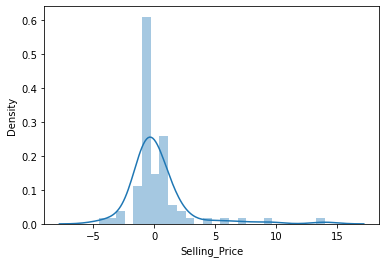

In [38]:
sns.distplot(y_test-predictions)

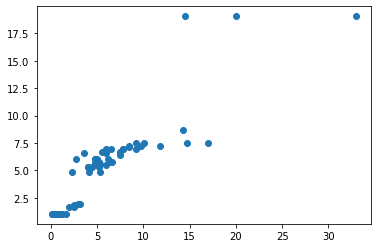

In [39]:
plt.scatter(y_test,predictions)

In [40]:
import pickle

In [41]:
file = open('rand_forest_carmodel.pkl','wb')
pickle.dump(rf_random,file)

In [42]:
from sklearn import metrics

In [43]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Square Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 1.3967807082701866
Mean Square Error: 6.462078154724152
Root Mean Square Error: 2.5420617920743296
